## Read me
#### How to use
1. Put all data which read from Data Collector App into file "data". **Totally 8 files: battery.csv, cpuFreq.csv, cpuTime.csv, gpu.csv, memory.csv, net.csv, temperature.csv, time.csv**. Data generation frequency: 1/s.
2. Put all heat map photos which read from front side IR camera into file "FLIROne_front". Photo generation frequency: 1/5s.
3. Put all heat map photos which read from back side IR camera into file "FLIROne_back". Photo generation frequency: 1/5s.
4. "Cell" -> "Run All"

***Data preprocessing takes time, especially in the case of abstracting specific data from numpy array of heat map. It take 0.5s at least to deal with one heat map. Just be patient :) I will try to optimise it later... By Xiaoyang***

#### Code structure
1. Data preprocessing (Done)
2. ML Model. I set a Linear Regression here as a "Hello World" model, feel free to replace whatever model you like : )

###### Author: Xiaoyang Zhang      @@@      Email: xzhan211@binghamton.edu

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Time csv

In [2]:
Time = pd.read_csv('data/time.csv', sep='\t', names=["time"])
Time.drop(Time.index[len(Time)-1], inplace = True)
Time['time'] = Time['time'].astype(int)

In [3]:
Time.head()

,time
0,155208
1,155209
2,155211
3,155212
4,155213


In [4]:
Time.tail()

,time
1145,161323
1146,161325
1147,161326
1148,161327
1149,161328


### Battery csv

In [5]:
Battery = pd.read_csv('data/battery.csv', sep=',', names=["bat_voltage", "bat_temp", "bat_capacity", "bat_current"])
Battery.drop(Battery.index[len(Battery)-1], inplace = True)
for x in list(Battery.columns.values):
    Battery[x] = Battery[x].astype(float)

In [6]:
Battery['bat_power'] = (Battery.bat_voltage / 1000) * (Battery.bat_current / 1000) * 1000

In [7]:
Battery.head()

,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power
0,4286.0,35.0,100.0,302.0,1294.372
1,4244.0,35.0,100.0,1015.0,4307.660
2,4220.0,35.0,100.0,1120.0,4726.400
3,4279.0,35.0,100.0,356.0,1523.324
4,4278.0,35.0,100.0,436.0,1865.208


In [8]:
Battery.tail()

,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power
1145,4178.0,38.0,94.0,573.0,2393.994
1146,4168.0,38.0,94.0,856.0,3567.808
1147,4135.0,38.0,94.0,1277.0,5280.395
1148,4128.0,38.0,94.0,1359.0,5609.952
1149,4179.0,38.0,94.0,518.0,2164.722


### GPU csv

In [9]:
GPU = pd.read_csv('data/gpu.csv', sep=',', names=["gpu_usage", "gpu_temp", "gpu_freq"])
GPU.drop(GPU.index[len(GPU)-1], inplace = True)
for x in list(GPU.columns.values):
    GPU[x] = GPU[x].astype(float)

In [10]:
GPU.head()

,gpu_usage,gpu_temp,gpu_freq
0,3.0,37.0,257000000.0
1,16.0,38.2,257000000.0
2,16.0,39.7,257000000.0
3,24.0,39.3,257000000.0
4,8.0,40.1,257000000.0


In [11]:
GPU.tail()

,gpu_usage,gpu_temp,gpu_freq
1145,11.0,47.1,257000000.0
1146,11.0,47.1,257000000.0
1147,13.0,48.2,257000000.0
1148,23.0,49.4,257000000.0
1149,28.0,47.8,257000000.0


### Net csv (KB/s)

In [12]:
Net = pd.read_csv('data/net.csv', sep=',', names=["tx", "rx"])
Net.drop(Net.index[len(Net)-1], inplace = True)
for x in list(Net.columns.values):
    Net[x] = Net[x].astype(float)

In [13]:
Net.head()

,tx,rx
0,8920.990,2359894.000
1,0.000,0.000
2,2.530,1.812
3,0.631,1.865
4,16.084,17.719


In [14]:
Net.tail()

,tx,rx
1145,19.401,1333.933
1146,14.100,5651.054
1147,18.570,6497.365
1148,17.154,7270.328
1149,10.306,216.859


### CPU frequency csv (kHz)

In [15]:
size = len(pd.read_csv('data/cpuFreq.csv').columns);

In [16]:
titles = []
for i in range(0, size):
    titles.append('f_cpu' + str(i))

CPUFreq = pd.read_csv('data/cpuFreq.csv', sep=',', names=titles)
CPUFreq.drop(CPUFreq.index[len(CPUFreq)-1], inplace = True)
for x in list(CPUFreq.columns.values):
    CPUFreq[x] = CPUFreq[x].astype(float)

In [17]:
CPUFreq.head()

,f_cpu0,f_cpu1,f_cpu2,f_cpu3,f_cpu4,f_cpu5,f_cpu6,f_cpu7
0,1785600.0,1785600.0,1785600.0,1785600.0,2131200.0,2131200.0,2131200.0,1497600.0
1,1785600.0,1785600.0,1785600.0,1785600.0,1286400.0,1401600.0,1401600.0,1497600.0
2,1785600.0,1785600.0,1785600.0,1785600.0,2227200.0,2227200.0,2227200.0,1920000.0
3,1785600.0,1785600.0,1785600.0,1785600.0,1612800.0,1612800.0,1612800.0,1401600.0
4,1785600.0,1785600.0,1785600.0,1785600.0,1708800.0,1708800.0,1708800.0,1401600.0


In [18]:
CPUFreq.tail()

,f_cpu0,f_cpu1,f_cpu2,f_cpu3,f_cpu4,f_cpu5,f_cpu6,f_cpu7
1145,1785600.0,1785600.0,1785600.0,1785600.0,1401600.0,1497600.0,1497600.0,940800.0
1146,1785600.0,1785600.0,1785600.0,1785600.0,1920000.0,1920000.0,1920000.0,1708800.0
1147,1785600.0,1785600.0,1785600.0,1785600.0,2419200.0,2419200.0,2419200.0,2419200.0
1148,1785600.0,1785600.0,1785600.0,1785600.0,1804800.0,1804800.0,1804800.0,1497600.0
1149,1113600.0,1113600.0,1113600.0,1113600.0,1708800.0,1708800.0,1708800.0,1401600.0


### CPU time csv

In [19]:
colSize = len(pd.read_csv('data/cpuTime.csv').columns);
titles = []
for i in range(0, colSize):
    if i == 0:
        titles.append('cpu')
    else:
        titles.append('cpu' + str(i-1))
#titles

In [20]:
CPUTime = pd.read_csv('data/cpuTime.csv', sep=',', names=titles)
CPUTime.drop(CPUTime.index[len(CPUTime)-1], inplace = True)

In [21]:
CPUTime.head()

,cpu,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
0,162235 35747 169666 4086288 4148 25621 13992 ...,26253 8079 31658 481797 376 8023 2475 0 0 0,25494 8154 32583 482528 321 3622 5640 0 0 0,24674 2499 32839 492022 474 2910 3217 0 0 0,24342 2632 32950 487177 301 9164 1821 0 0 0,16809 3377 9921 534739 311 453 186 0 0 0,18475 4249 12308 529614 334 562 205 0 0 0,18331 4370 12073 529930 351 548 198 0 0 0,7854 2382 5330 548477 1677 335 246 0 0 0
1,162325 35769 169759 4086919 4148 25628 13994 ...,26265 8087 31671 481864 376 8028 2476 0 0 0,25507 8161 32604 482589 321 3623 5641 0 0 0,24693 2500 32852 492092 474 2911 3217 0 0 0,24350 2633 32975 487246 301 9164 1822 0 0 0,16820 3378 9927 534829 311 453 186 0 0 0,18491 4252 12317 529695 334 562 205 0 0 0,18336 4371 12078 530023 351 549 198 0 0 0,7859 2382 5333 548578 1677 335 246 0 0 0
2,162403 35777 169876 4087570 4148 25635 13996 ...,26275 8088 31679 481946 376 8030 2477 0 0 0,25515 8162 32632 482660 321 3625 5641 0 0 0,24705 2501 32895 492139 474 2912 3218 0 0 0,24362 2634 32982 487333 301 9166 1822 0 0 0,16826 3378 9935 534921 311 453 187 0 0 0,18502 4252 12324 529784 334 562 205 0 0 0,18349 4375 12086 530110 351 549 198 0 0 0,7865 2383 5338 548673 1677 335 246 0 0 0
3,162494 35785 169941 4088249 4148 25646 14000 ...,26291 8088 31693 482017 376 8034 2477 0 0 0,25534 8162 32645 482732 321 3625 5643 0 0 0,24722 2501 32907 492210 474 2913 3220 0 0 0,24375 2637 32994 487406 301 9171 1822 0 0 0,16833 3382 9941 535015 311 453 187 0 0 0,18511 4252 12328 529880 334 562 205 0 0 0,18357 4375 12090 530208 351 549 198 0 0 0,7868 2383 5339 548779 1677 335 246 0 0 0
4,162569 35790 170003 4088946 4149 25658 14004 ...,26301 8089 31701 482096 376 8038 2478 0 0 0,25542 8163 32657 482815 321 3626 5644 0 0 0,24731 2504 32918 492292 474 2914 3221 0 0 0,24385 2637 33006 487484 301 9176 1822 0 0 0,16846 3383 9948 535103 312 453 187 0 0 0,18522 4253 12334 529971 334 562 205 0 0 0,18369 4376 12096 530297 351 549 198 0 0 0,7870 2383 5341 548884 1678 335 246 0 0 0


In [22]:
CPUTime.tail()

,cpu,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
1145,274552 47240 275804 4817386 5251 43615 23117 ...,42020 9485 50179 560099 393 13378 3636 0 0 0,40636 9568 52578 560183 342 5499 11000 0 0 0,41287 3718 51956 573128 495 4469 4813 0 0 0,40088 4037 51598 564518 320 16815 2336 0 0 0,30760 5637 17886 635727 558 861 323 0 0 0,33352 5810 21612 629170 494 1050 344 0 0 0,32866 6009 21279 629802 529 1028 343 0 0 0,13540 2972 8714 664756 2116 512 319 0 0 0
1146,274661 47259 275889 4818014 5251 43629 23132 ...,42038 9486 50195 560165 393 13382 3636 0 0 0,40652 9569 52594 560245 342 5501 11010 0 0 0,41301 3723 51969 573197 495 4470 4817 0 0 0,40107 4038 51614 564584 320 16820 2336 0 0 0,30772 5640 17892 635816 558 861 323 0 0 0,33363 5816 21618 629257 494 1051 344 0 0 0,32878 6011 21285 629890 529 1028 343 0 0 0,13546 2973 8717 664857 2116 512 319 0 0 0
1147,274781 47275 276002 4818610 5252 43642 23145 ...,42059 9487 50219 560225 393 13387 3637 0 0 0,40670 9569 52617 560303 342 5503 11019 0 0 0,41317 3723 51989 573262 495 4471 4820 0 0 0,40126 4041 51633 564646 320 16825 2337 0 0 0,30787 5644 17902 635900 558 861 323 0 0 0,33374 5819 21623 629342 494 1051 344 0 0 0,32894 6014 21295 629973 529 1029 343 0 0 0,13552 2974 8721 664955 2116 512 319 0 0 0
1148,274921 47318 276140 4819128 5252 43655 23159 ...,42077 9501 50240 560273 393 13391 3638 0 0 0,40693 9574 52647 560342 342 5505 11029 0 0 0,41333 3727 52013 573319 495 4473 4822 0 0 0,40146 4043 51662 564697 320 16829 2337 0 0 0,30800 5651 17911 635981 558 861 323 0 0 0,33393 5824 21631 629417 494 1051 344 0 0 0,32912 6019 21305 630051 529 1029 343 0 0 0,13565 2976 8726 665045 2116 512 319 0 0 0
1149,274986 47340 276190 4819813 5254 43662 23162 ...,42089 9510 50250 560341 393 13394 3638 0 0 0,40706 9578 52655 560418 344 5506 11030 0 0 0,41340 3730 52022 573399 495 4473 4823 0 0 0,40159 4044 51672 564776 320 16830 2337 0 0 0,30806 5652 17917 636074 558 862 323 0 0 0,33399 5825 21635 629511 494 1051 344 0 0 0,32916 6021 21307 630146 529 1029 343 0 0 0,13569 2977 8728 665144 2116 513 319 0 0 0


In [23]:
rowSize = len(CPUTime.index)
seven = 7

In [24]:
threeD = []
for c in range(0, colSize):
    twoD = []
    for r in range(0, rowSize):
        line = CPUTime.iloc[r][c]
        arr = line.split()
        oneD = []
        for i in range(0, seven):
            oneD.append(int(arr[i]))
        twoD.append(oneD)
    threeD.append(twoD) 

In [25]:
threeD[0]

[[162235, 35747, 169666, 4086288, 4148, 25621, 13992],
 [162325, 35769, 169759, 4086919, 4148, 25628, 13994],
 [162403, 35777, 169876, 4087570, 4148, 25635, 13996],
 [162494, 35785, 169941, 4088249, 4148, 25646, 14000],
 [162569, 35790, 170003, 4088946, 4149, 25658, 14004],
 [162669, 35806, 170099, 4089584, 4149, 25672, 14010],
 [162763, 35817, 170187, 4090237, 4149, 25685, 14020],
 [162851, 35849, 170277, 4090877, 4149, 25699, 14032],
 [162953, 35862, 170370, 4091518, 4155, 25714, 14043],
 [163063, 35866, 170448, 4092163, 4155, 25730, 14046],
 [163157, 35869, 170552, 4092807, 4155, 25746, 14049],
 [163261, 35874, 170647, 4093451, 4155, 25761, 14052],
 [163366, 35882, 170724, 4094104, 4155, 25774, 14055],
 [163469, 35895, 170814, 4094736, 4155, 25789, 14062],
 [163572, 35920, 170943, 4095328, 4156, 25803, 14080],
 [163688, 35935, 171048, 4095938, 4156, 25818, 14094],
 [163794, 35956, 171143, 4096563, 4156, 25833, 14107],
 [163897, 35966, 171240, 4097211, 4158, 25849, 14115],
 [164001, 

In [26]:
for i in range(0, colSize):
    for j in range(rowSize-1, 0, -1):
        for k in range(0, seven):
            threeD[i][j][k] = threeD[i][j][k] - threeD[i][j-1][k]

In [27]:
threeD[0]

[[162235, 35747, 169666, 4086288, 4148, 25621, 13992],
 [90, 22, 93, 631, 0, 7, 2],
 [78, 8, 117, 651, 0, 7, 2],
 [91, 8, 65, 679, 0, 11, 4],
 [75, 5, 62, 697, 1, 12, 4],
 [100, 16, 96, 638, 0, 14, 6],
 [94, 11, 88, 653, 0, 13, 10],
 [88, 32, 90, 640, 0, 14, 12],
 [102, 13, 93, 641, 6, 15, 11],
 [110, 4, 78, 645, 0, 16, 3],
 [94, 3, 104, 644, 0, 16, 3],
 [104, 5, 95, 644, 0, 15, 3],
 [105, 8, 77, 653, 0, 13, 3],
 [103, 13, 90, 632, 0, 15, 7],
 [103, 25, 129, 592, 1, 14, 18],
 [116, 15, 105, 610, 0, 15, 14],
 [106, 21, 95, 625, 0, 15, 13],
 [103, 10, 97, 648, 2, 16, 8],
 [104, 5, 90, 644, 6, 16, 3],
 [103, 4, 89, 647, 0, 16, 3],
 [108, 6, 84, 651, 0, 16, 3],
 [115, 5, 83, 653, 0, 16, 3],
 [95, 6, 85, 657, 0, 16, 4],
 [100, 20, 111, 617, 1, 16, 13],
 [103, 13, 91, 629, 0, 15, 12],
 [104, 20, 91, 625, 0, 16, 16],
 [104, 10, 97, 631, 0, 16, 8],
 [104, 12, 91, 633, 0, 16, 9],
 [105, 16, 96, 634, 0, 16, 10],
 [106, 12, 93, 637, 1, 15, 5],
 [106, 14, 86, 639, 0, 16, 8],
 [112, 13, 102, 621, 0

#### user  nice  system  idle  iowait  irq  softirq

In [28]:
final3D = []
for i in range(0, colSize):
    twoD = pd.DataFrame(columns='total user% nice% system% idle% iowait% irq% softirq%'.split())
    index = 0
    for j in range(0, rowSize):
        line = threeD[i][j]
        total = sum(line)
        oneD = []
        oneD.append(total)
        for k in range(0, seven):
            oneD.append(round(threeD[i][j][k]*100 / total))
        twoD.loc[index] = oneD
        index += 1
    final3D.append(twoD)

In [29]:
final3D[0].head()

,total,user%,nice%,system%,idle%,iowait%,irq%,softirq%
0,4497697,4,1,4,91,0,1,0
1,845,11,3,11,75,0,1,0
2,863,9,1,14,75,0,1,0
3,858,11,1,8,79,0,1,0
4,856,9,1,7,81,0,1,0


In [30]:
final3D[0].tail()

,total,user%,nice%,system%,idle%,iowait%,irq%,softirq%
1145,857,11,1,9,76,0,2,1
1146,870,13,2,10,72,0,2,2
1147,872,14,2,13,68,0,1,1
1148,866,16,5,16,60,0,2,2
1149,834,8,3,6,82,0,1,0


### Memory csv (kB)

In [31]:
Memory = pd.read_csv('data/memory.csv')

In [32]:
colSize = len(Memory.columns)
titles = []
for i in range(0, colSize):
    titles.append(Memory.iloc[0][i].split(':')[0])

In [33]:
Memory = pd.read_csv('data/memory.csv', sep=',', names=titles)
rowSize = len(Memory)
for i in range(0, rowSize):
    for j in range(0, colSize):
        Memory.iloc[i][j] = Memory.iloc[i][j].split(':')[1].strip().split()[0]

In [34]:
for x in list(Memory.columns.values):
    Memory[x] = Memory[x].astype(float)

In [35]:
Memory.head()

,Thread quantity,MemTotal,MemFree,MemAvailable,Buffers,Cached,SwapCached,Active,Inactive,Active(anon),...,ION_heap,ION_heap_pool,WritebackTmp,CommitLimit,Committed_AS,VmallocTotal,VmallocUsed,VmallocChunk,CmaTotal,CmaFree
0,15.0,5598060.0,120624.0,2424520.0,3180.0,2546736.0,82272.0,1667764.0,1658756.0,465096.0,...,834700.0,638096.0,0.0,4896176.0,81017860.0,263061440.0,104456.0,0.0,233472.0,0.0
1,15.0,5598060.0,164600.0,2469144.0,3180.0,2546876.0,84344.0,1614944.0,1658112.0,412232.0,...,834700.0,631684.0,0.0,4896176.0,81001920.0,263061440.0,104520.0,0.0,233472.0,5496.0
2,15.0,5598060.0,160244.0,2464332.0,3180.0,2547932.0,92324.0,1597064.0,1668076.0,394300.0,...,834704.0,623632.0,0.0,4896176.0,81015620.0,263061440.0,104892.0,0.0,233472.0,10228.0
3,15.0,5598060.0,157840.0,2461764.0,3180.0,2547732.0,90016.0,1596896.0,1673800.0,394144.0,...,834704.0,653108.0,0.0,4896176.0,81020320.0,263061440.0,104940.0,0.0,233472.0,10600.0
4,15.0,5598060.0,126500.0,2430252.0,3180.0,2546552.0,93868.0,1623900.0,1677920.0,421140.0,...,836496.0,596392.0,0.0,4896176.0,81051824.0,263061440.0,105052.0,0.0,233472.0,208.0


In [36]:
Memory.tail()

,Thread quantity,MemTotal,MemFree,MemAvailable,Buffers,Cached,SwapCached,Active,Inactive,Active(anon),...,ION_heap,ION_heap_pool,WritebackTmp,CommitLimit,Committed_AS,VmallocTotal,VmallocUsed,VmallocChunk,CmaTotal,CmaFree
1145,15.0,5598060.0,153364.0,2445192.0,3180.0,2536552.0,74796.0,1662144.0,1615856.0,454680.0,...,847056.0,121924.0,0.0,4896176.0,66974068.0,263061440.0,100120.0,0.0,233472.0,8316.0
1146,15.0,5598060.0,142836.0,2439596.0,3180.0,2541620.0,74792.0,1664456.0,1620788.0,456988.0,...,847056.0,126548.0,0.0,4896176.0,66974068.0,263061440.0,100120.0,0.0,233472.0,8316.0
1147,15.0,5598060.0,133312.0,2436224.0,3180.0,2547720.0,74812.0,1665912.0,1626972.0,458432.0,...,847056.0,99092.0,0.0,4896176.0,66974068.0,263061440.0,100140.0,0.0,233472.0,7700.0
1148,15.0,5598060.0,180140.0,2487880.0,3180.0,2550704.0,74788.0,1626588.0,1630880.0,419092.0,...,847056.0,660148.0,0.0,4896176.0,66905352.0,263061440.0,99988.0,0.0,233472.0,10864.0
1149,15.0,5598060.0,179816.0,2487712.0,3180.0,2550588.0,74688.0,1629108.0,1630756.0,421640.0,...,847056.0,683236.0,0.0,4896176.0,66908836.0,263061440.0,100004.0,0.0,233472.0,11032.0


### Temperature csv

In [37]:
temp = pd.read_csv('data/temperature.csv')
colSize = len(temp.columns)
rowSize = len(temp)

In [38]:
titles = []
for i in range(0, colSize):
    titles.append(temp.iloc[rowSize-1][i])
len(titles)

88

In [39]:
Temperature = pd.read_csv('data/temperature.csv', sep=',', names=titles)
Temperature.drop(Temperature.index[len(Temperature)-1], inplace = True)
for x in list(Temperature.columns.values):
    Temperature[x] = Temperature[x].astype(float)

In [40]:
Temperature.head()

,aoss0-usr,cpu-0-0-usr,cpu-0-1-usr,cpu-0-2-usr,cpu-0-3-usr,cpuss-0-usr,cpuss-1-usr,cpu-1-0-usr,cpu-1-1-usr,cpu-1-2-usr,...,disp-therm,usbc-therm-adc,usbc-therm-monitor,bcl-cycle,bcl-virt-extreme,maxfg,charger,s2mpg01_tz,usb,battery
0,37000.0,39300.0,39700.0,39000.0,39000.0,40500.0,40100.0,42000.0,42400.0,39700.0,...,35591.0,35399.0,35399.0,16.0,0.0,35400.0,34000.0,38703.0,35400.0,35400.0
1,38200.0,41700.0,42800.0,42000.0,41300.0,42400.0,42000.0,38600.0,40100.0,40500.0,...,35581.0,35402.0,35399.0,16.0,0.0,35400.0,34000.0,37536.0,35400.0,35400.0
2,40100.0,44400.0,44400.0,44800.0,43600.0,45500.0,44800.0,41300.0,43600.0,43600.0,...,35527.0,35395.0,35392.0,16.0,0.0,35400.0,34000.0,37536.0,35300.0,35400.0
3,39300.0,42800.0,42400.0,41700.0,41700.0,43200.0,42400.0,40500.0,41300.0,40900.0,...,35486.0,35392.0,35388.0,16.0,0.0,35400.0,34000.0,38703.0,35300.0,35400.0
4,40100.0,42800.0,42800.0,43200.0,42400.0,43600.0,42800.0,40500.0,41700.0,41700.0,...,35463.0,35392.0,35392.0,16.0,0.0,35500.0,34000.0,38703.0,35300.0,35500.0


In [41]:
Temperature.tail()

,aoss0-usr,cpu-0-0-usr,cpu-0-1-usr,cpu-0-2-usr,cpu-0-3-usr,cpuss-0-usr,cpuss-1-usr,cpu-1-0-usr,cpu-1-1-usr,cpu-1-2-usr,...,disp-therm,usbc-therm-adc,usbc-therm-monitor,bcl-cycle,bcl-virt-extreme,maxfg,charger,s2mpg01_tz,usb,battery
1145,46700.0,50500.0,50500.0,49800.0,49800.0,50500.0,49800.0,48200.0,49400.0,49000.0,...,37980.0,38044.0,38041.0,16.0,0.0,38400.0,37000.0,42204.0,38000.0,38400.0
1146,47500.0,51300.0,50900.0,50900.0,50200.0,51700.0,51300.0,48600.0,50500.0,51700.0,...,37977.0,38048.0,38048.0,16.0,0.0,38400.0,37000.0,42204.0,38000.0,38400.0
1147,49000.0,53200.0,53600.0,52900.0,51700.0,54800.0,54000.0,51700.0,53200.0,52500.0,...,37963.0,38038.0,38051.0,16.0,0.0,38400.0,37000.0,43371.0,38000.0,38400.0
1148,50200.0,56000.0,56000.0,54800.0,54000.0,56300.0,55600.0,54400.0,53200.0,53200.0,...,37967.0,38041.0,38044.0,16.0,0.0,38300.0,37000.0,43371.0,38000.0,38300.0
1149,48200.0,50900.0,50900.0,50200.0,50900.0,51700.0,51300.0,50900.0,52900.0,51300.0,...,37994.0,38038.0,38041.0,16.0,0.0,38300.0,37000.0,42204.0,38000.0,38300.0


### Ground true from heat map

In [42]:
import os
import flirimageextractor 
#API https://flirimageextractor.readthedocs.io/en/latest/flirimageextractor.html

In [43]:
dirpath = os.getcwd() + '/FLIROne_back/'
print(dirpath)
pictures = []
for r, d, f in os.walk(dirpath):
    for file in f:
        if '.jpg' in file:
            pictures.append(file);
#pictures

/Users/xiaoyangzhang/git_base/Smartphone_Data_Analysis/FLIROne_back/


In [44]:
GroundTrue = []
flir = flirimageextractor.FlirImageExtractor()
for i, pic in enumerate(pictures):
    print(pic)
    flir.process_image("FLIRONE_back/" + pic)
    data = flir.extract_thermal_image()
    GroundTrue.append(np.max(data))

flir_20200225T161240.jpg
flir_20200225T160604.jpg
flir_20200225T160837.jpg
flir_20200225T155913.jpg
flir_20200225T160943.jpg
flir_20200225T160200.jpg
flir_20200225T155721.jpg
flir_20200206T155336.jpg
flir_20200225T155641.jpg
flir_20200225T160407.jpg
flir_20200225T160413.jpg
flir_20200225T161043.jpg
flir_20200225T155333.jpg
flir_20200225T155858.jpg
flir_20200225T160029.jpg
flir_20200225T155938.jpg
flir_20200225T160559.jpg
flir_20200225T161109.jpg
flir_20200225T155535.jpg
flir_20200225T155509.jpg
flir_20200225T160216.jpg
flir_20200225T161134.jpg
flir_20200225T155736.jpg
flir_20200225T160014.jpg
flir_20200225T155656.jpg
flir_20200225T160821.jpg
flir_20200225T161256.jpg
flir_20200225T155454.jpg
flir_20200225T161054.jpg
flir_20200225T160438.jpg
flir_20200225T160428.jpg
flir_20200225T155444.jpg
flir_20200225T155646.jpg
flir_20200225T160831.jpg
flir_20200206T155331.jpg
flir_20200225T160004.jpg
flir_20200225T155726.jpg
flir_20200225T160206.jpg
flir_20200225T161124.jpg
flir_20200225T155530.jpg


In [45]:
GroundTrue = np.around(GroundTrue, decimals=2).tolist()

In [46]:
picTime = []
for i, pic in enumerate(pictures):
    picTime.append((pic.split('T')[1].split('.')[0]))

In [47]:
RightSet = pd.DataFrame(columns='time heatest_temp'.split())
index = 0;
for i in range(0, len(GroundTrue)):
        buf = []
        buf.append(picTime[i])
        buf.append(GroundTrue[i])
        RightSet.loc[index] = buf
        index += 1
    
RightSet = RightSet.sort_values(by=['time'])
RightSet['time'] = RightSet['time'].astype(int)

In [48]:
RightSet.head(3)

,time,heatest_temp
58,155320,38.03
47,155323,37.97
51,155326,35.90


In [49]:
RightSet.tail(3)

,time,heatest_temp
230,161306,40.35
240,161311,40.48
201,161316,40.64


### Combine tables to final data set

In [50]:
#memory
print(Memory.columns)
selectedMemCol = ['Thread quantity', 'MemFree', 'MemAvailable']
PartMemory = Memory[selectedMemCol]

Index(['Thread quantity', 'MemTotal', 'MemFree', 'MemAvailable', 'Buffers',
       'Cached', 'SwapCached', 'Active', 'Inactive', 'Active(anon)',
       'Inactive(anon)', 'Active(file)', 'Inactive(file)', 'Unevictable',
       'Mlocked', 'SwapTotal', 'SwapFree', 'Dirty', 'Writeback', 'AnonPages',
       'Mapped', 'Shmem', 'Slab', 'SReclaimable', 'SUnreclaim', 'KernelStack',
       'ShadowCallStack', 'PageTables', 'NFS_Unstable', 'Bounce', 'ION_heap',
       'ION_heap_pool', 'WritebackTmp', 'CommitLimit', 'Committed_AS',
       'VmallocTotal', 'VmallocUsed', 'VmallocChunk', 'CmaTotal', 'CmaFree'],
      dtype='object')


In [51]:
#temperature
#print(Temperature.columns)
selectedTempCol = ['cpu-1-0-usr', 'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr', 'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr', 'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm']
PartTemp = Temperature[selectedTempCol]

In [52]:
#time
idleTitle = []
cpuQuantity = len(final3D)
for i in range(0, cpuQuantity):
    if i==0:
        idleTitle.append("cpuIdle")
    else:
        idleTitle.append("cpuIdle" + str(i-1))

PartTime = pd.DataFrame(columns=idleTitle)
for r in range(0, rowSize):
    oneLine = []
    for n in range(0, cpuQuantity):
        oneLine.append(final3D[n]["idle%"][r])
    PartTime.loc[r] = oneLine

In [53]:
for x in list(PartTime.columns.values):
    PartTime[x] = PartTime[x].astype(float)
PartTime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 0 to 1149
Data columns (total 9 columns):
cpuIdle     1150 non-null float64
cpuIdle0    1150 non-null float64
cpuIdle1    1150 non-null float64
cpuIdle2    1150 non-null float64
cpuIdle3    1150 non-null float64
cpuIdle4    1150 non-null float64
cpuIdle5    1150 non-null float64
cpuIdle6    1150 non-null float64
cpuIdle7    1150 non-null float64
dtypes: float64(9)
memory usage: 89.8 KB


In [54]:
PartTime.head()

,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7
0,91.0,86.0,86.0,88.0,87.0,95.0,94.0,94.0,97.0
1,75.0,63.0,59.0,67.0,66.0,83.0,74.0,89.0,93.0
2,75.0,79.0,65.0,45.0,80.0,86.0,83.0,78.0,89.0
3,79.0,68.0,68.0,69.0,69.0,85.0,88.0,89.0,96.0
4,81.0,77.0,78.0,77.0,74.0,80.0,83.0,82.0,95.0


In [55]:
#combine all dataframe
LeftSet = pd.concat([Time, Battery, GPU, Net, CPUFreq, PartMemory, PartTemp, PartTime], axis=1)
#LeftSet = pd.concat([Time, Battery, GPU], axis=1)
LeftSet.head()

,time,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power,gpu_usage,gpu_temp,gpu_freq,tx,...,xo-therm,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7
0,155208,4286.0,35.0,100.0,302.0,1294.372,3.0,37.0,257000000.0,8920.990,...,35520.0,91.0,86.0,86.0,88.0,87.0,95.0,94.0,94.0,97.0
1,155209,4244.0,35.0,100.0,1015.0,4307.660,16.0,38.2,257000000.0,0.000,...,35601.0,75.0,63.0,59.0,67.0,66.0,83.0,74.0,89.0,93.0
2,155211,4220.0,35.0,100.0,1120.0,4726.400,16.0,39.7,257000000.0,2.530,...,35774.0,75.0,79.0,65.0,45.0,80.0,86.0,83.0,78.0,89.0
3,155212,4279.0,35.0,100.0,356.0,1523.324,24.0,39.3,257000000.0,0.631,...,36054.0,79.0,68.0,68.0,69.0,69.0,85.0,88.0,89.0,96.0
4,155213,4278.0,35.0,100.0,436.0,1865.208,8.0,40.1,257000000.0,16.084,...,36274.0,81.0,77.0,78.0,77.0,74.0,80.0,83.0,82.0,95.0


In [56]:
len(LeftSet)

1150

In [57]:
len(RightSet)

247

In [58]:
DataSet = pd.merge(LeftSet, RightSet, how='inner', on='time')

In [59]:
FlatDataSet = pd.merge(LeftSet, RightSet, how='left', on='time')

In [60]:
FlatDataSet[200:250]

,time,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power,gpu_usage,gpu_temp,gpu_freq,tx,...,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7,heatest_temp
200,155550,4247.0,36.0,100.0,730.0,3100.310,10.0,45.5,257000000.0,21.574,...,70.0,65.0,54.0,65.0,60.0,75.0,77.0,77.0,90.0,38.94
201,155551,4245.0,36.0,100.0,664.0,2818.680,10.0,45.5,257000000.0,13.848,...,71.0,63.0,63.0,68.0,60.0,77.0,79.0,82.0,83.0,NaN
202,155552,4256.0,36.0,100.0,459.0,1953.504,12.0,45.1,257000000.0,0.000,...,75.0,67.0,68.0,64.0,64.0,84.0,80.0,79.0,94.0,NaN
203,155553,4258.0,36.0,100.0,435.0,1852.230,11.0,45.1,257000000.0,0.103,...,76.0,64.0,66.0,72.0,62.0,83.0,81.0,82.0,95.0,NaN
204,155555,4253.0,36.0,100.0,498.0,2117.994,12.0,45.1,257000000.0,2.427,...,75.0,63.0,69.0,69.0,64.0,81.0,80.0,79.0,95.0,38.82
205,155556,4256.0,36.0,100.0,493.0,2098.208,12.0,44.8,257000000.0,0.000,...,75.0,65.0,71.0,70.0,59.0,82.0,79.0,80.0,95.0,NaN
206,155557,4254.0,36.0,100.0,554.0,2356.716,12.0,44.8,257000000.0,0.000,...,75.0,64.0,63.0,68.0,64.0,85.0,80.0,83.0,96.0,NaN
207,155558,4255.0,36.0,100.0,747.0,3178.485,12.0,45.1,257000000.0,13.322,...,73.0,61.0,65.0,70.0,64.0,78.0,81.0,75.0,93.0,NaN
208,155559,4244.0,36.0,100.0,601.0,2550.644,11.0,45.5,257000000.0,21.013,...,70.0,66.0,57.0,65.0,59.0,75.0,75.0,77.0,87.0,NaN
209,155600,4245.0,36.0,100.0,750.0,3183.750,10.0,45.5,257000000.0,22.353,...,70.0,64.0,55.0,59.0,64.0,74.0,83.0,72.0,88.0,39.09


In [61]:
len(DataSet)

225

In [62]:
len(LeftSet)

1150

In [63]:
len(RightSet)

247

In [64]:
DataSet.head()

,time,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power,gpu_usage,gpu_temp,gpu_freq,tx,...,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7,heatest_temp
0,155320,4245.0,35.0,100.0,866.0,3676.170,10.0,44.8,257000000.0,16.318,...,71.0,62.0,58.0,64.0,64.0,78.0,77.0,77.0,89.0,38.03
1,155323,4255.0,35.0,100.0,588.0,2501.940,10.0,44.8,257000000.0,4.125,...,73.0,64.0,64.0,67.0,63.0,79.0,77.0,74.0,90.0,37.97
2,155326,4260.0,35.0,100.0,579.0,2466.540,11.0,44.4,257000000.0,0.151,...,75.0,65.0,67.0,64.0,64.0,82.0,82.0,80.0,95.0,35.90
3,155328,4256.0,35.0,100.0,591.0,2515.296,11.0,44.8,257000000.0,4.088,...,75.0,66.0,66.0,68.0,63.0,82.0,81.0,75.0,94.0,38.01
4,155331,4229.0,35.0,100.0,1061.0,4486.969,10.0,45.1,257000000.0,14.958,...,73.0,62.0,66.0,69.0,61.0,77.0,76.0,81.0,88.0,35.56


In [65]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 224
Data columns (total 47 columns):
time               225 non-null int64
bat_voltage        225 non-null float64
bat_temp           225 non-null float64
bat_capacity       225 non-null float64
bat_current        225 non-null float64
bat_power          225 non-null float64
gpu_usage          225 non-null float64
gpu_temp           225 non-null float64
gpu_freq           225 non-null float64
tx                 225 non-null float64
rx                 225 non-null float64
f_cpu0             225 non-null float64
f_cpu1             225 non-null float64
f_cpu2             225 non-null float64
f_cpu3             225 non-null float64
f_cpu4             225 non-null float64
f_cpu5             225 non-null float64
f_cpu6             225 non-null float64
f_cpu7             225 non-null float64
Thread quantity    225 non-null float64
MemFree            225 non-null float64
MemAvailable       225 non-null float64
cpu-1-0-usr      

In [66]:
DataSet.describe()

,time,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power,gpu_usage,gpu_temp,gpu_freq,tx,...,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7,heatest_temp
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.0,225.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,158794.546667,4220.515556,36.715556,97.333333,586.035556,2472.244751,10.942222,45.859111,257000000.0,8.196049,...,73.782222,64.786667,63.702222,67.013333,63.653333,79.911111,78.875556,79.008889,91.866667,39.335600
std,2460.379555,25.687875,0.999544,2.100170,151.543542,634.678659,0.796894,0.761530,0.0,10.129395,...,2.161275,2.614998,5.484983,3.081454,2.475739,3.578346,2.769828,2.944412,3.674235,1.129728
min,155320.000000,4171.000000,35.000000,94.000000,392.000000,1655.024000,9.000000,44.000000,257000000.0,0.000000,...,68.000000,57.000000,51.000000,56.000000,56.000000,70.000000,70.000000,72.000000,78.000000,33.990000
25%,155731.000000,4200.000000,36.000000,96.000000,474.000000,2001.702000,10.000000,45.100000,257000000.0,0.000000,...,72.000000,63.000000,59.000000,65.000000,62.000000,78.000000,77.000000,77.000000,89.000000,38.860000
50%,160241.000000,4223.000000,37.000000,98.000000,518.000000,2185.442000,11.000000,45.900000,257000000.0,0.567000,...,75.000000,65.000000,65.000000,68.000000,64.000000,81.000000,79.000000,79.000000,93.000000,39.400000
75%,160806.000000,4242.000000,37.000000,99.000000,694.000000,2900.930000,12.000000,46.300000,257000000.0,17.270000,...,75.000000,66.000000,68.000000,69.000000,65.000000,83.000000,81.000000,81.000000,95.000000,40.220000
max,161316.000000,4264.000000,38.000000,100.000000,1140.000000,4838.160000,12.000000,47.500000,257000000.0,38.012000,...,79.000000,73.000000,73.000000,75.000000,69.000000,88.000000,84.000000,89.000000,98.000000,40.900000


In [67]:
DataSet.columns

Index(['time', 'bat_voltage', 'bat_temp', 'bat_capacity', 'bat_current',
       'bat_power', 'gpu_usage', 'gpu_temp', 'gpu_freq', 'tx', 'rx', 'f_cpu0',
       'f_cpu1', 'f_cpu2', 'f_cpu3', 'f_cpu4', 'f_cpu5', 'f_cpu6', 'f_cpu7',
       'Thread quantity', 'MemFree', 'MemAvailable', 'cpu-1-0-usr',
       'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr',
       'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr',
       'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm',
       'cpuIdle', 'cpuIdle0', 'cpuIdle1', 'cpuIdle2', 'cpuIdle3', 'cpuIdle4',
       'cpuIdle5', 'cpuIdle6', 'cpuIdle7', 'heatest_temp'],
      dtype='object')

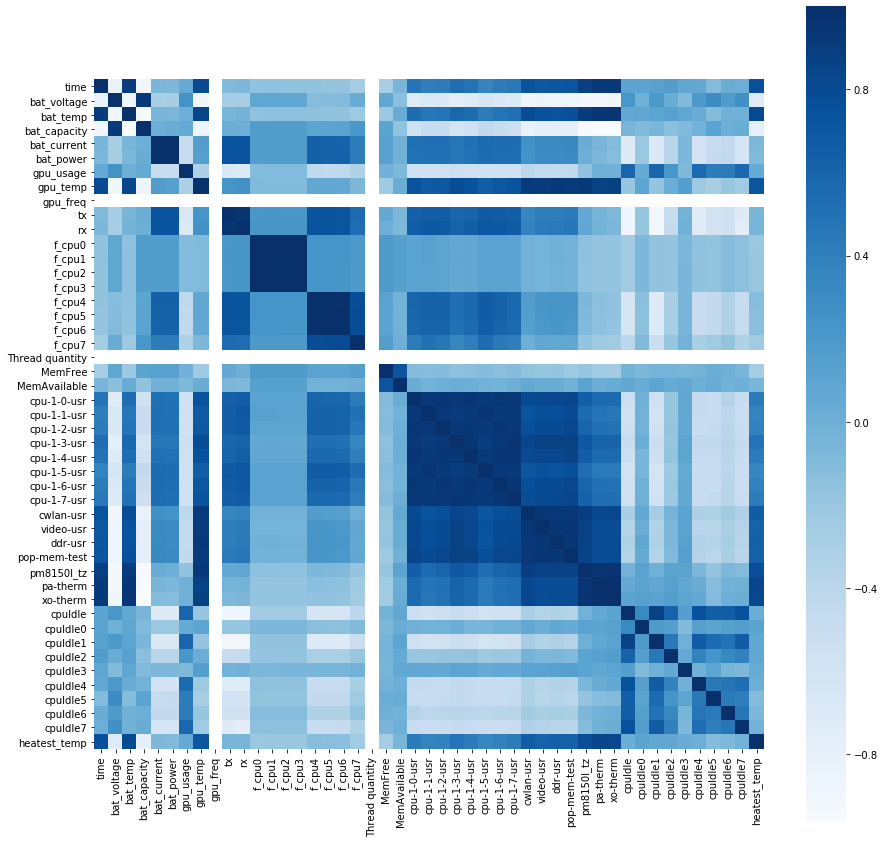

In [68]:
plt.subplots(figsize=(15, 15))
sns.heatmap(DataSet.corr(), vmax=1, square=True, cmap="Blues")
#plt.savefig('./BluesStateRelation.png')
plt.show()

### Description about DataSet
DataSet is the final data pool.

DataSet = LeftSet + RightSet

LeftSet is the statistic data which collected from Data Collector App.

RightSet is the temperature data which abstracted from heat map photos.

**There are already plenty of important features in the pool:**

1. time: format is hhmmss
2. battery: current voltage, current, temperature, capacity
3. GPU: usage, temp, frequency
4. network: tx (upload speed), rx (download speed)
5. CPU Frequency: CPU0 ~ CPU7
6. thread quantity
7. memory: free size, available size
8. CPU Temperature: CPU0 ~ CPU7 (cpu-1-x-usr)
9. WIFI IC Temperature (cwlan-usr)
10. temperature relates to video (video-user, I don't know which hardware generates this temperature)
11. temperature relates to DDR of memory (DDR-usr)
12. temperature relates to memory (pop-mem-test)
13. temperature relates to power manager IC (pm8150l_tz)
14. temperature relates to power amplifier (pa-therm)
15. CPU idle percentage (cpuIdle, cpuidle0 ~ 7)
16. ground truth, surface temperature from smartphone (heatest_temp)

### Above part is data preprocessing

# =======================================================

### Below part is the ML model
#### How to use:
Step1: Grab features you need from DataSet to get the "X" and "y" set. "y" is the groud true set.

Step2: Pick the ML model you like, have fun : )





# Hello World model example




## Training a Linear Regression Model



### X and y arrays

In [69]:
X = DataSet[['time', 'bat_voltage', 'bat_temp', 'bat_capacity', 'bat_current', 'bat_power',
       'gpu_usage', 'gpu_temp', 'gpu_freq', 'tx', 'rx', 'f_cpu0', 'f_cpu1',
       'f_cpu2', 'f_cpu3', 'f_cpu4', 'f_cpu5', 'f_cpu6', 'f_cpu7',
       'Thread quantity', 'MemFree', 'MemAvailable', 'cpu-1-0-usr',
       'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr',
       'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr',
       'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm',
       'cpuIdle', 'cpuIdle0', 'cpuIdle1', 'cpuIdle2', 'cpuIdle3', 'cpuIdle4',
       'cpuIdle5', 'cpuIdle6', 'cpuIdle7']]
y = DataSet['heatest_temp']

### Add delay

In [70]:
#X.drop(X.index[:6], inplace=True)
#y.drop(y.index[len(y)-6:], inplace=True)

### Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Creating and Training the Model

In [73]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evaluation

In [74]:
# print the intercept
print(lm.intercept_)

-10.7948168256


In [75]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
time,-7.069107e-05
bat_voltage,2.631584e-03
bat_temp,1.861923e-01
bat_capacity,5.439538e-02
bat_current,-6.969291e-03
bat_power,1.721886e-03
gpu_usage,8.908527e-02
gpu_temp,-1.157102e-01
gpu_freq,-1.469259e-12
tx,3.878351e-03


### Predictions from our Model

In [76]:
predictions = lm.predict(X_test)

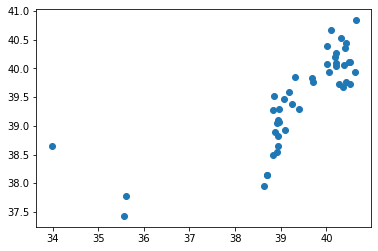

In [77]:
plt.scatter(y_test,predictions)

/Users/xiaoyangzhang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


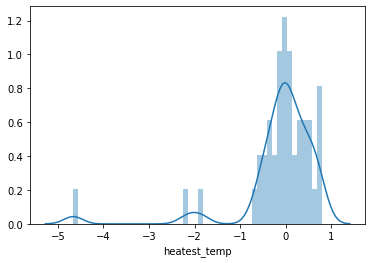

In [78]:
sns.distplot((y_test-predictions),bins=50);

### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [79]:
from sklearn import metrics

In [154]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.485781290872
MSE: 0.802966330264
RMSE: 0.89608388573


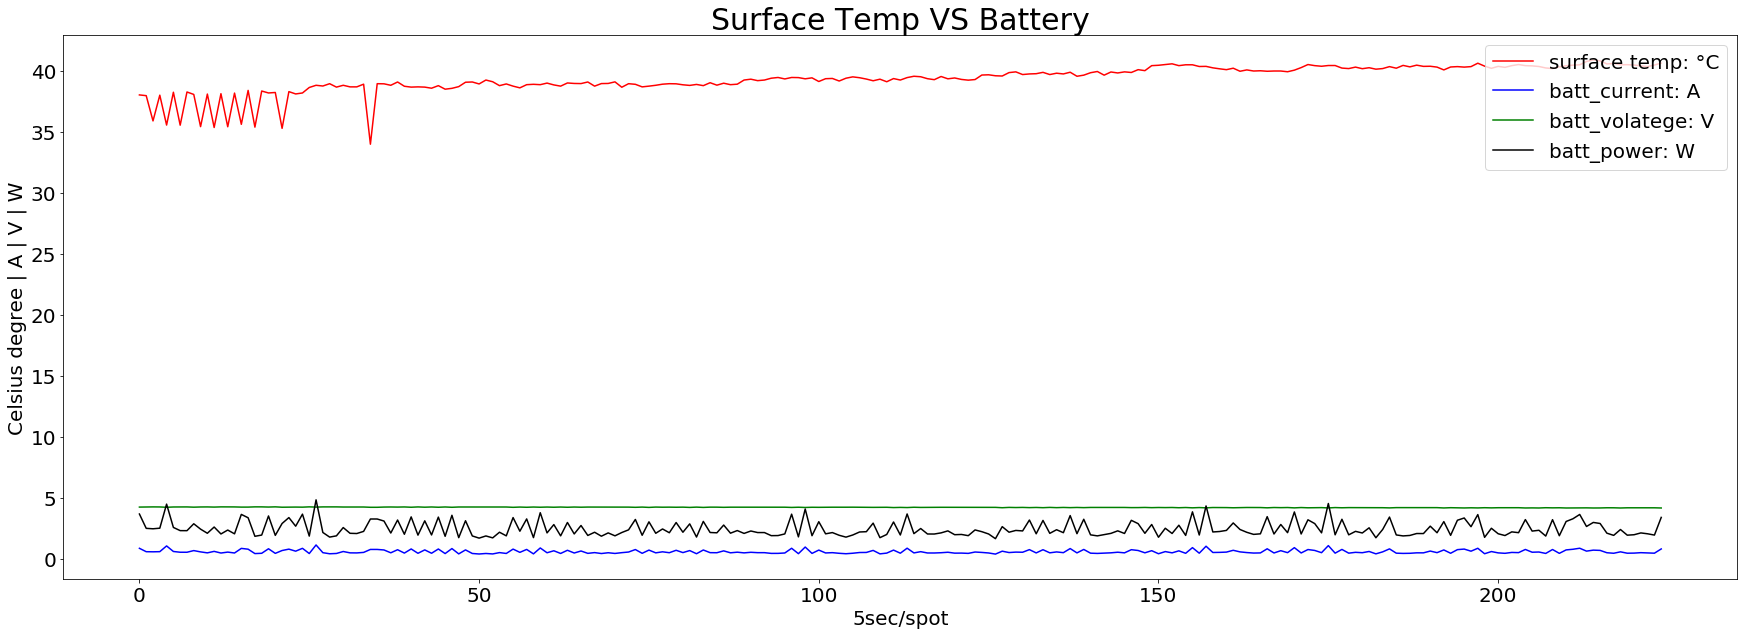

In [155]:
plt.figure(figsize=(30, 10))

plt.title('Surface Temp VS Battery', fontsize=30)
plt.xlabel('5sec/spot', fontsize=20)
plt.ylabel('°C | A | V | W', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(y, color='red', label='surface temp: °C')
plt.plot(X['bat_current']/1000, color='blue', label = 'batt_current: A')
plt.plot(X['bat_voltage']/1000, color='green', label = 'batt_volatege: V')
plt.plot(X['bat_power']/1000, color='black', label = 'batt_power: W')

plt.legend(loc=1, prop={'size': 20})

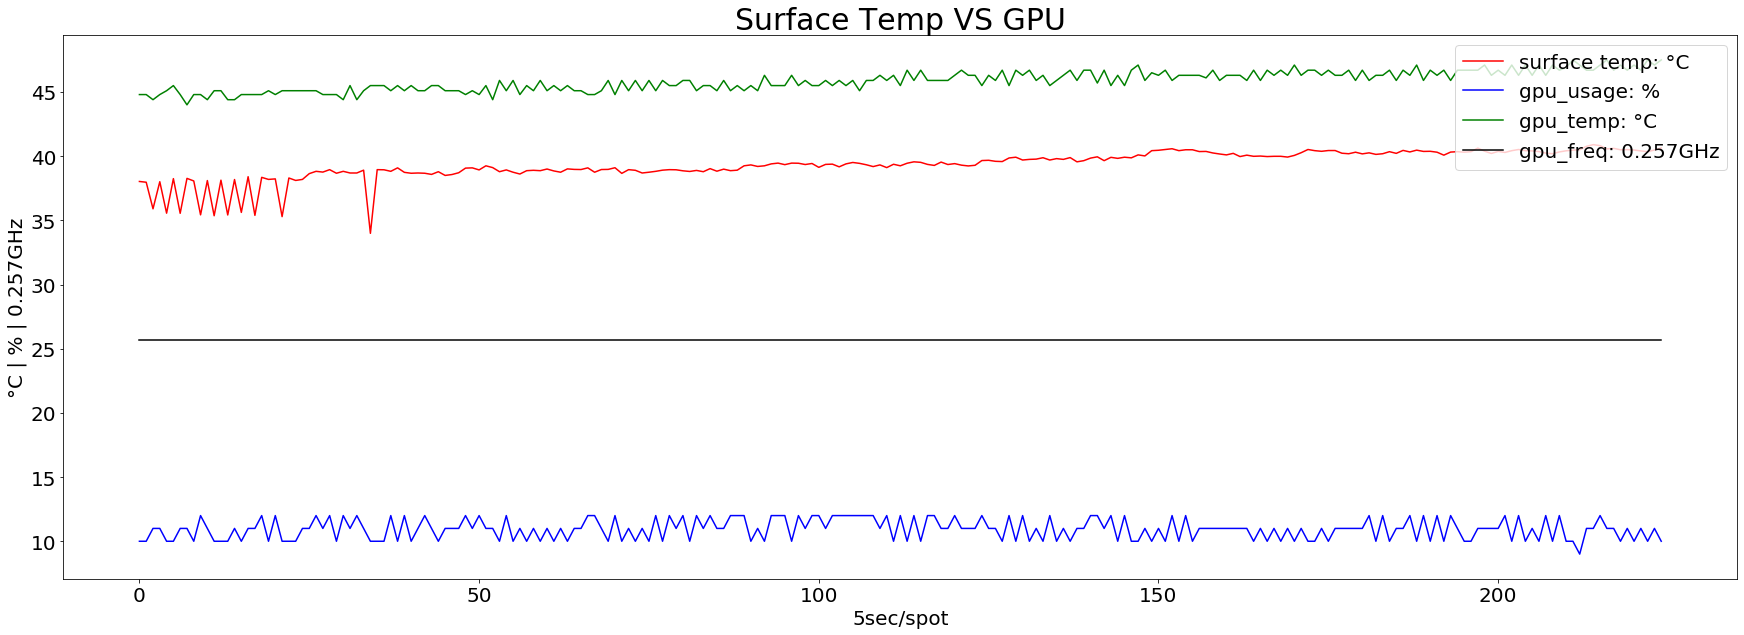

In [156]:
plt.figure(figsize=(30, 10))

plt.title('Surface Temp VS GPU', fontsize=30)
plt.xlabel('5sec/spot', fontsize=20)
plt.ylabel('°C | % | 0.257GHz', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(y, color='red', label='surface temp: °C')
plt.plot(X['gpu_usage'], color='blue', label = 'gpu_usage: %')
plt.plot(X['gpu_temp'], color='green', label = 'gpu_temp: °C')
plt.plot(X['gpu_freq']/10000000, color='black', label = 'gpu_freq: 0.257GHz')

plt.legend(loc=1, prop={'size': 20})

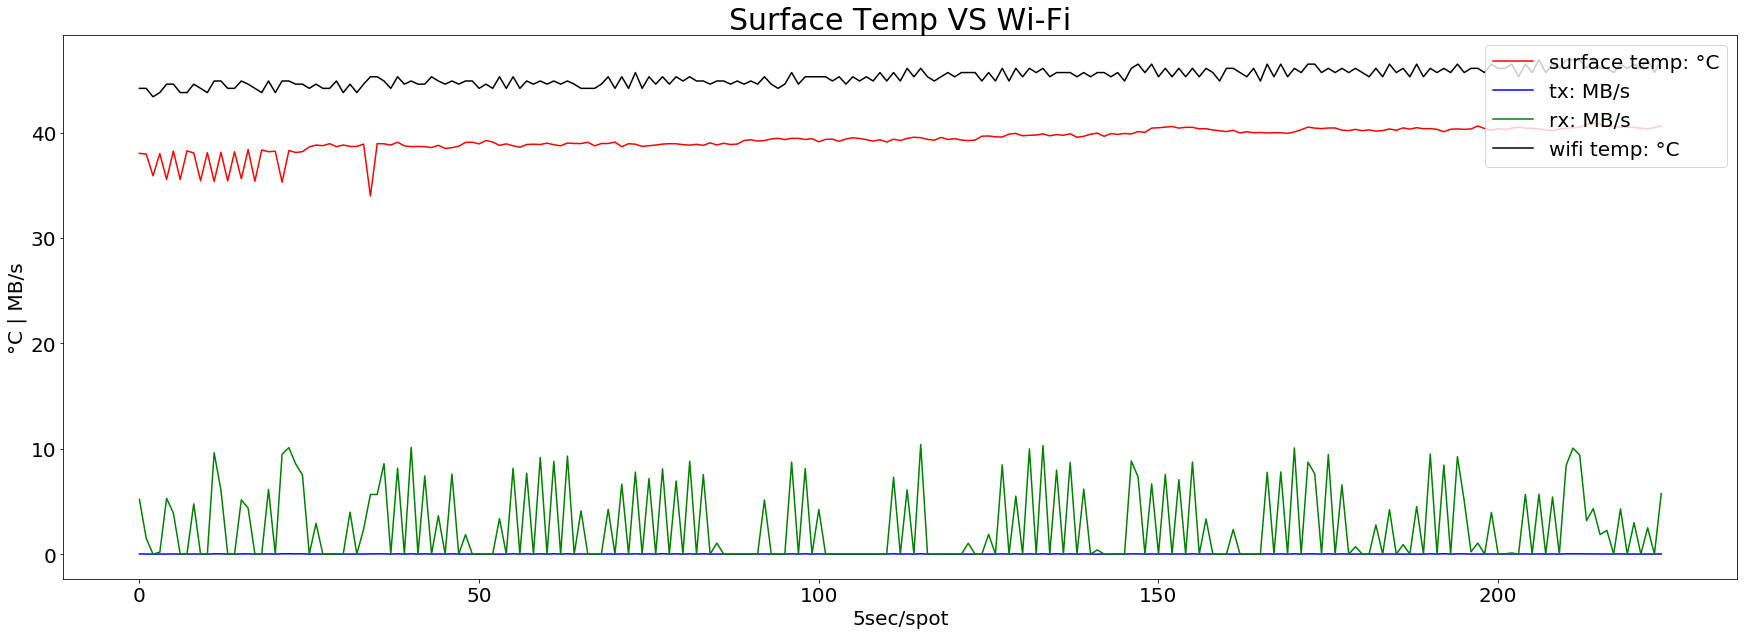

In [157]:
plt.figure(figsize=(30, 10))

plt.title('Surface Temp VS Wi-Fi', fontsize=30)
plt.xlabel('5sec/spot', fontsize=20)
plt.ylabel('°C | MB/s', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(y, color='red', label='surface temp: °C')
plt.plot(X['tx']/1000, color='blue', label = 'tx: MB/s')
plt.plot(X['rx']/1000, color='green', label = 'rx: MB/s')
plt.plot(X['cwlan-usr']/1000, color='black', label = 'wifi temp: °C')

plt.legend(loc=1, prop={'size': 20})

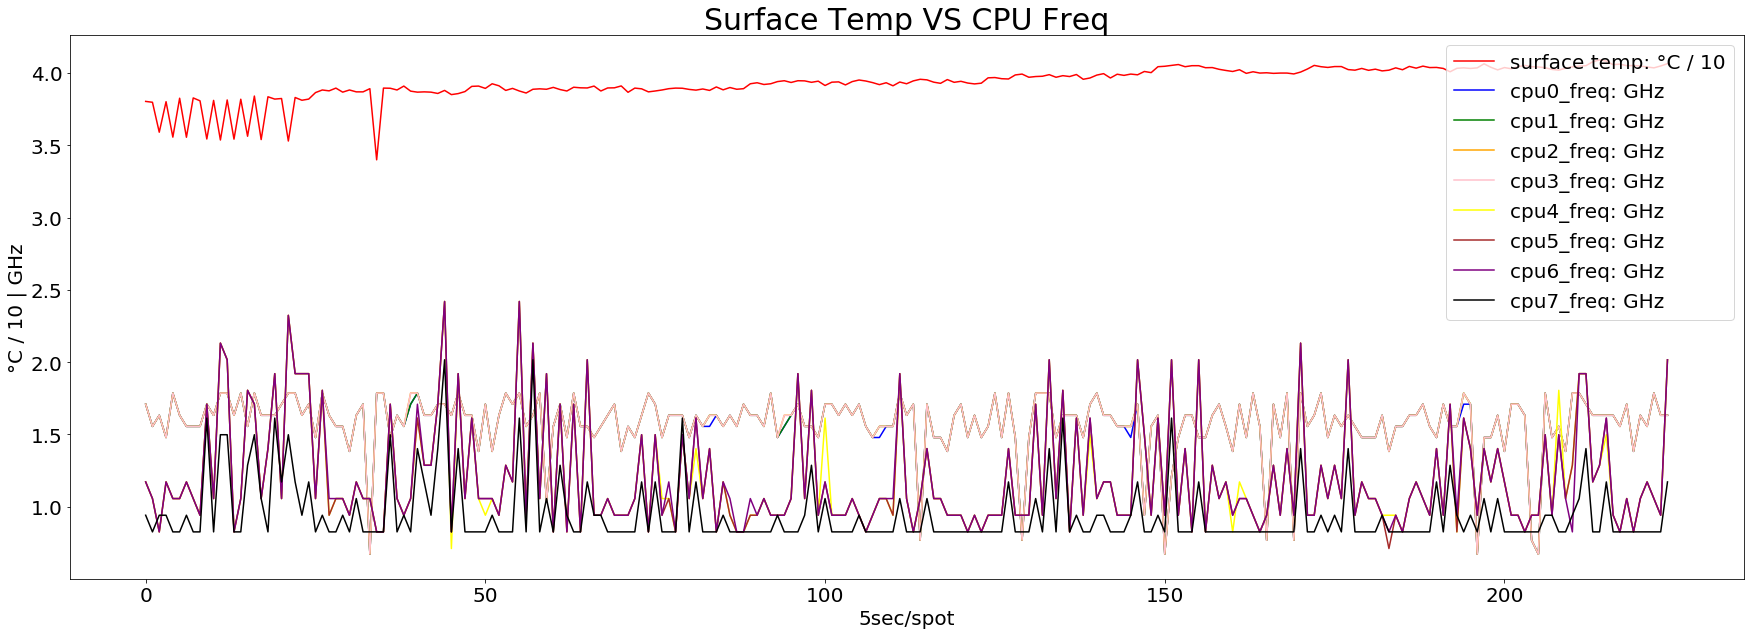

In [158]:
plt.figure(figsize=(30, 10))

plt.title('Surface Temp VS CPU Freq', fontsize=30)
plt.xlabel('5sec/spot', fontsize=20)
plt.ylabel('°C / 10 | GHz', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(y/10, color='red', label='surface temp: °C / 10')
plt.plot(X['f_cpu0']/1000000, color='blue', label = 'cpu0_freq: GHz')
plt.plot(X['f_cpu1']/1000000, color='green', label = 'cpu1_freq: GHz')
plt.plot(X['f_cpu2']/1000000, color='orange', label = 'cpu2_freq: GHz')
plt.plot(X['f_cpu3']/1000000, color='pink', label = 'cpu3_freq: GHz')
plt.plot(X['f_cpu4']/1000000, color='yellow', label = 'cpu4_freq: GHz')
plt.plot(X['f_cpu5']/1000000, color='brown', label = 'cpu5_freq: GHz')
plt.plot(X['f_cpu6']/1000000, color='purple', label = 'cpu6_freq: GHz')
plt.plot(X['f_cpu7']/1000000, color='black', label = 'cpu7_freq: GHz')

plt.legend(loc=1, prop={'size': 20})

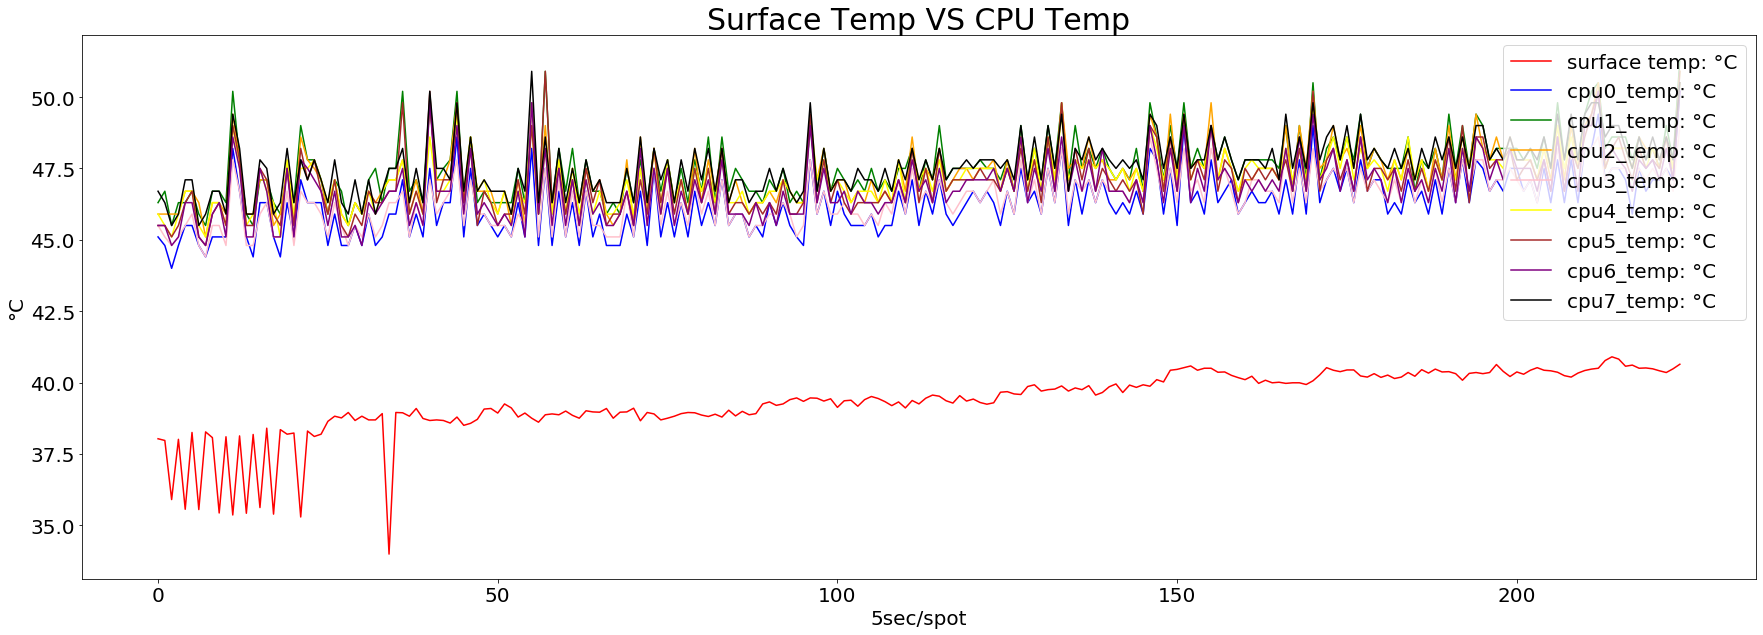

In [159]:
plt.figure(figsize=(30, 10))

plt.title('Surface Temp VS CPU Temp', fontsize=30)
plt.xlabel('5sec/spot', fontsize=20)
plt.ylabel('°C', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(y, color='red', label='surface temp: °C')
plt.plot(X['cpu-1-0-usr']/1000, color='blue', label = 'cpu0_temp: °C')
plt.plot(X['cpu-1-1-usr']/1000, color='green', label = 'cpu1_temp: °C')
plt.plot(X['cpu-1-2-usr']/1000, color='orange', label = 'cpu2_temp: °C')
plt.plot(X['cpu-1-3-usr']/1000, color='pink', label = 'cpu3_temp: °C')
plt.plot(X['cpu-1-4-usr']/1000, color='yellow', label = 'cpu4_temp: °C')
plt.plot(X['cpu-1-5-usr']/1000, color='brown', label = 'cpu5_temp: °C')
plt.plot(X['cpu-1-6-usr']/1000, color='purple', label = 'cpu6_temp: °C')
plt.plot(X['cpu-1-7-usr']/1000, color='black', label = 'cpu7_temp: °C')

plt.legend(loc=1, prop={'size': 20})

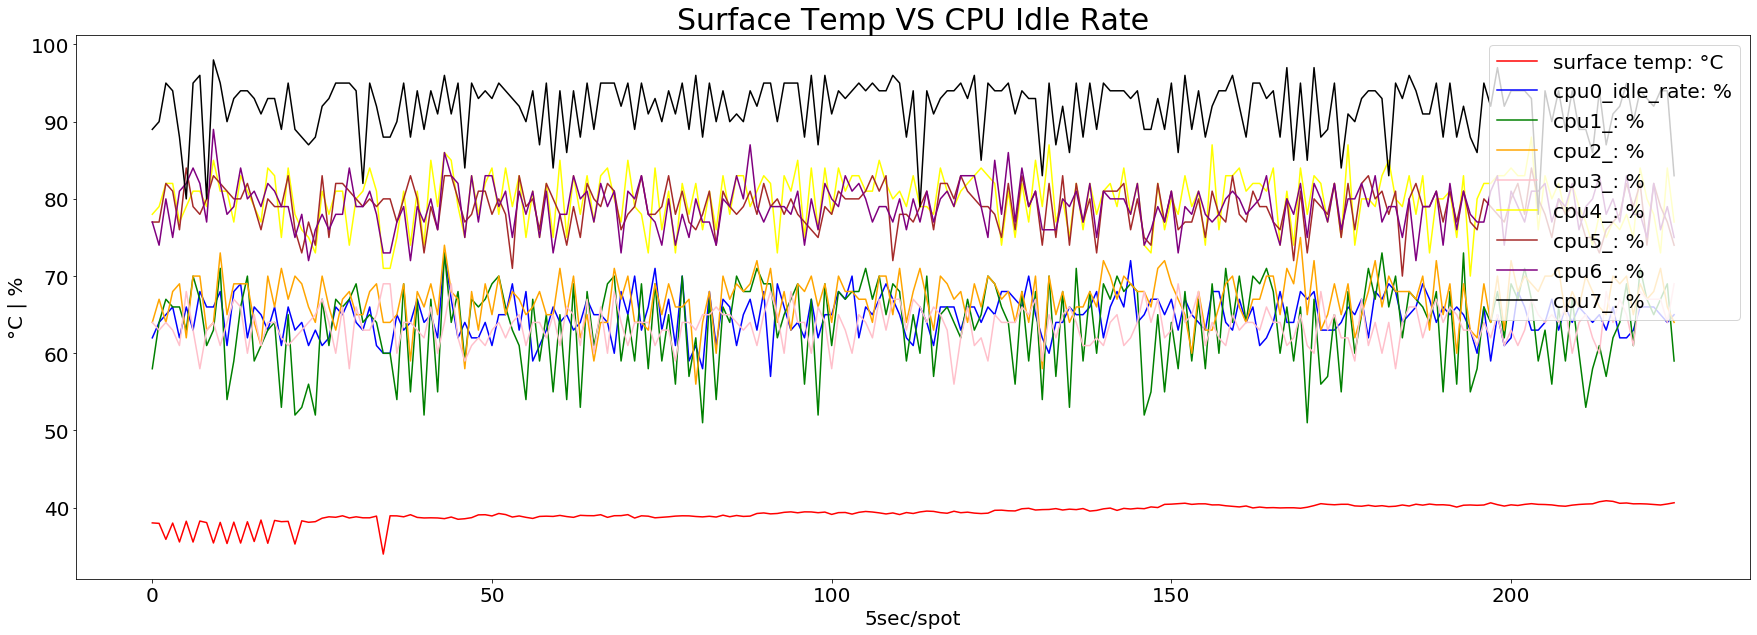

In [160]:
plt.figure(figsize=(30, 10))

plt.title('Surface Temp VS CPU Idle Rate', fontsize=30)
plt.xlabel('5sec/spot', fontsize=20)
plt.ylabel('°C | %', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(y, color='red', label='surface temp: °C')
plt.plot(X['cpuIdle0'], color='blue', label = 'cpu0_idle_rate: %')
plt.plot(X['cpuIdle1'], color='green', label = 'cpu1_: %')
plt.plot(X['cpuIdle2'], color='orange', label = 'cpu2_: %')
plt.plot(X['cpuIdle3'], color='pink', label = 'cpu3_: %')
plt.plot(X['cpuIdle4'], color='yellow', label = 'cpu4_: %')
plt.plot(X['cpuIdle5'], color='brown', label = 'cpu5_: %')
plt.plot(X['cpuIdle6'], color='purple', label = 'cpu6_: %')
plt.plot(X['cpuIdle7'], color='black', label = 'cpu7_: %')

plt.legend(loc=1, prop={'size': 20})

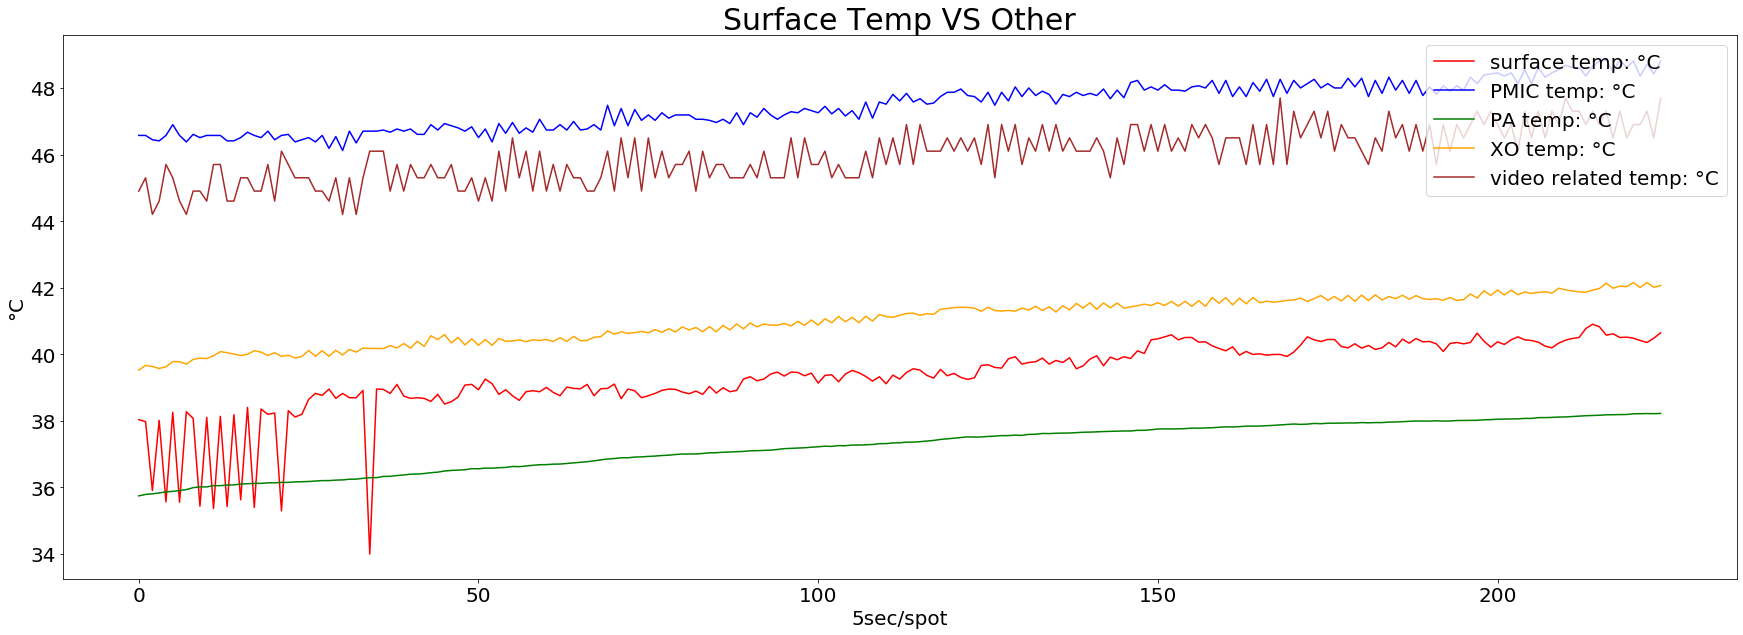

In [162]:
plt.figure(figsize=(30, 10))

plt.title('Surface Temp VS Other', fontsize=30)
plt.xlabel('5sec/spot', fontsize=20)
plt.ylabel('°C', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(y, color='red', label='surface temp: °C')
plt.plot(X['pm8150l_tz']/1000, color='blue', label = 'PMIC temp: °C')
plt.plot(X['pa-therm']/1000, color='green', label = 'PA temp: °C')
plt.plot(X['xo-therm']/1000, color='orange', label = 'XO temp: °C')
plt.plot(X['video-usr']/1000, color='brown', label = 'video related temp: °C')

plt.legend(loc=1, prop={'size': 20})